In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/마케팅_전처리/마케팅커뮤니케이션.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 ...,25년차 학력 무관 영어 소통하는 것에 능숙하신 분 미국 시장에 대한 이해도가 높...
1,타겟 고객에 대한 세일즈 전략을 수립하고 실행합니다 B2B 마켓을 타겟하는 마...,3년 이상의 SaaS 및 B2B대기업 공기관 등 세일즈 경험 자신만의 고객사 관리...
2,컨텐츠 마케팅 전략 기획 블로그 관리 업무 SNS바이럴 마케팅 콘텐츠 제작 관리 ...,미적 감각을 겸비한 다재 다능한 마케터 Adobe Photoshop Illustr...
3,세일즈 목표 관리 및 영업 전략 수립 대행사 대상 신규 시장 기회 발굴 인아웃바운...,미디어렙사 매체사 종대사 미디어팀 등 유관 업계 경력을 최소 5년 이상 보유하신 ...
4,기업 뉴미디어 채널 기획 및 운영 유튜브 채널 기획 운영 제작부서와의 협업 ...,해당분야 경력 2년 8년 디지털 플랫폼유튜브 소셜미디어 등에 대한 이해도가 높...
...,...,...
111,온라인마케팅 전략 수립 및 실행 검색엔진 최적화SEO를 통한 웹사이트 트래픽 증대...,학력 무관 경력3년이상 필수 디자인포토샵일러스트 능숙자퍼포먼스마케팅 가능한 분 ...
112,비플레인 SNS 콘텐츠 기획 및 운영 관리 비플레인 서포터즈 체험단 등 바이럴 운...,SNS 운영 콘텐츠 기획 경력이 2년 이상이신 분 뷰티 유튜버에 흥미와 관심도가...
113,1 브랜드의 인플루언서 마케팅을 수주하고 집행 및 관리 2 브랜드의 마케팅 니즈 방...,1 인플루언서 마케팅커머스에 관심 있으신 분 2 트렌드에 관심이 많고 제품브랜드 발...
114,효과적 효율적인 마케팅 실행을 통해 미리캔버스 글로벌 유효 고객 수와 매출을 폭발...,미리캔버스 글로벌 고객 수를 폭발적으로 성장시킬 수 있는 비전과 실행 계획을 깊게...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 ...
1,타겟 고객에 대한 세일즈 전략을 수립하고 실행합니다 B2B 마켓을 타겟하는 마...
2,컨텐츠 마케팅 전략 기획 블로그 관리 업무 SNS바이럴 마케팅 콘텐츠 제작 관리 ...
3,세일즈 목표 관리 및 영업 전략 수립 대행사 대상 신규 시장 기회 발굴 인아웃바운...
4,기업 뉴미디어 채널 기획 및 운영 유튜브 채널 기획 운영 제작부서와의 협업 ...
...,...
111,온라인마케팅 전략 수립 및 실행 검색엔진 최적화SEO를 통한 웹사이트 트래픽 증대...
112,비플레인 SNS 콘텐츠 기획 및 운영 관리 비플레인 서포터즈 체험단 등 바이럴 운...
113,1 브랜드의 인플루언서 마케팅을 수주하고 집행 및 관리 2 브랜드의 마케팅 니즈 방...
114,효과적 효율적인 마케팅 실행을 통해 미리캔버스 글로벌 유효 고객 수와 매출을 폭발...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/마케팅_전처리/마케팅커뮤니케이션(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 관리 커뮤니케이션 해외팀 광고 관리 커뮤니케이션 콘텐츠 촬영 커뮤니케이션 해외 샘플 출고 및 정산 필수 제출서류 1 중요 나는 어떻게 살다 가고 싶은가를 생각해보고 적어 제출해주세요 분량 자유2 자기소개서 및 경력기술 포함 이력서\n  타겟 고객에 대한 세일즈 전략을 수립하고 실행합니다  B2B 마켓을 타겟하는 마케팅 전략을 수립하고 실행합니다  B2B 형 미리캔버스에 대한 이해를 바탕으로 세일즈 PT를 진행합니다  사업 제휴처를 발굴합니다 \n 컨텐츠 마케팅 전략 기획 블로그 관리 업무 SNS바이럴 마케팅 콘텐츠 제작 관리 인플루언서 모집 관리 및 대행사 관리\n 세일즈 목표 관리 및 영업 전략 수립 대행사 대상 신규 시장 기회 발굴 인아웃바운드 세일즈 및 미팅 리드 대행사 대상 미디어 플래닝 및 미디어 플랫폼 운영 관리 신규 매체 발굴 및 광고 매체 상품 기획\n기업 뉴미디어 채널 기획 및 운영     유튜브 채널 기획 운영 제작부서와의 협업     브랜디드 콘텐츠 기획 및 제작부서와의 협업     유튜브 외 기타 소셜미디어 운영디지털 마케팅 전략 수립 및 데이터 관리     브랜드 미디어 채널 방향성 제안     브랜드 미디어 운영 전략 수립 및 콘텐츠 기획 디지털 마케팅 운영 및 성과 관리     영상 캠페인 이벤트 기획 및 제작부서와의 협업      스토리텔링 소재 발굴 및 외부 인플루언서 협업     리포트 작성 및 전략에 따른 성과 관리 신규 프로젝트 제안서 작성 및 PT광고주 및 협력사 커뮤니케이션\n섬세이 브랜드의 바운더리 및 팀원의 시야를 확장시킵니다 해외 신규 제휴처 확보 및 관리 커뮤니케이션 해외팀 광고 관리 커뮤니케이션 콘텐츠 촬영 커뮤니케이션 해외 샘플 출고 및 정산 필수 제출서류 1 중요 나는 어떻게 살다 가고 싶은가를 생각해보고 적어 제출해주세요 분량 자유2 자기소개서 및 경력기술 포함 이력서\n Naver Kakao Google Met

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '섬세',
 '브랜드',
 '바운',
 '및',
 '팀',
 '시야',
 '확장',
 '해외',
 '신규',
 '제휴',
 '처',
 '확보',
 '및',
 '관리',
 '커뮤니케이션',
 '해외',
 '팀',
 '광고',
 '관리',
 '커뮤니케이션',
 '콘텐츠',
 '촬영',
 '커뮤니케이션',
 '해외',
 '샘플',
 '출고',
 '및',
 '정산',
 '필수',
 '제출',
 '서류',
 '중요',
 '나',
 '생각',
 '제출',
 '분량',
 '자유',
 '자기',
 '소개',
 '및',
 '경력',
 '기술',
 '포함',
 '이력서',
 '타겟',
 '고객',
 '대한',
 '전략',
 '수립',
 '실행',
 '마켓',
 '타겟',
 '마케팅',
 '전략',
 '수립',
 '실행',
 '형',
 '미리',
 '캔버스',
 '대한',
 '이해',
 '바탕',
 '를',
 '진행',
 '사업',
 '제휴',
 '처',
 '발굴',
 '컨텐츠',
 '마케팅',
 '전략',
 '기획',
 '블로그',
 '관리',
 '업무',
 '바이럴',
 '마케팅',
 '콘텐츠',
 '제작',
 '관리',
 '인',
 '플루',
 '모집',
 '관리',
 '및',
 '행사',
 '관리',
 '목표',
 '관리',
 '및',
 '영업',
 '전략',
 '수립',
 '행사',
 '대상',
 '신규',
 '시장',
 '기회',
 '발굴',
 '인',
 '아웃',
 '바운드',
 '및',
 '미팅',
 '리드',
 '행사',
 '대상',
 '미디어',
 '플래닝',
 '및',
 '미디어',
 '플랫폼',
 '운영',
 '관리',
 '신규',
 '매체',
 '발굴',
 '및',
 '광고',
 '매체',
 '상품',
 '기획',
 '기업',
 '뉴미디어',
 '채널',
 '기획',
 '및',
 '운영',
 '유튜브',
 '채널',
 '기획',
 '운영',
 '부서',
 '협업',
 '브랜디',
 '드',
 '콘텐츠',
 '기획',
 '및',
 

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

4938
573


FreqDist({'및': 295, '기획': 150, '운영': 143, '마케팅': 120, '관리': 102, '광고': 97, '인': 86, '플루': 83, '콘텐츠': 81, '등': 79, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '섬세',
 '브랜드',
 '바운',
 '시야',
 '확장',
 '해외',
 '제휴',
 '처',
 '확보',
 '관리',
 '커뮤니케이션',
 '해외',
 '광고',
 '관리',
 '커뮤니케이션',
 '콘텐츠',
 '촬영',
 '커뮤니케이션',
 '해외',
 '샘플',
 '출고',
 '정산',
 '필수',
 '제출',
 '서류',
 '중요',
 '나',
 '생각',
 '제출',
 '분량',
 '자유',
 '자기',
 '소개',
 '기술',
 '포함',
 '이력서',
 '타겟',
 '고객',
 '대한',
 '전략',
 '마켓',
 '타겟',
 '마케팅',
 '전략',
 '형',
 '미리',
 '캔버스',
 '대한',
 '이해',
 '바탕',
 '를',
 '진행',
 '사업',
 '제휴',
 '처',
 '발굴',
 '컨텐츠',
 '마케팅',
 '전략',
 '기획',
 '블로그',
 '관리',
 '바이럴',
 '마케팅',
 '콘텐츠',
 '관리',
 '모집',
 '관리',
 '행사',
 '관리',
 '목표',
 '관리',
 '영업',
 '전략',
 '행사',
 '대상',
 '시장',
 '기회',
 '발굴',
 '아웃',
 '바운드',
 '미팅',
 '리드',
 '행사',
 '대상',
 '미디어',
 '플래닝',
 '미디어',
 '플랫폼',
 '운영',
 '관리',
 '매체',
 '발굴',
 '광고',
 '매체',
 '상품',
 '기획',
 '기업',
 '뉴미디어',
 '채널',
 '기획',
 '운영',
 '유튜브',
 '채널',
 '기획',
 '운영',
 '부서',
 '협업',
 '브랜디',
 '드',
 '콘텐츠',
 '기획',
 '부서',
 '협업',
 '유튜브',
 '외',
 '기타',
 '소셜미디어',
 '운영',
 '마케팅',
 '전략',
 '데이터',
 '관리',
 '브랜드',
 '미디어',
 '채널',
 '방향성',
 '브랜드',
 '미디어',
 '운영',
 '전략',
 '콘텐츠',
 '기획',
 '마케팅',
 '운영',
 '성과',
 '

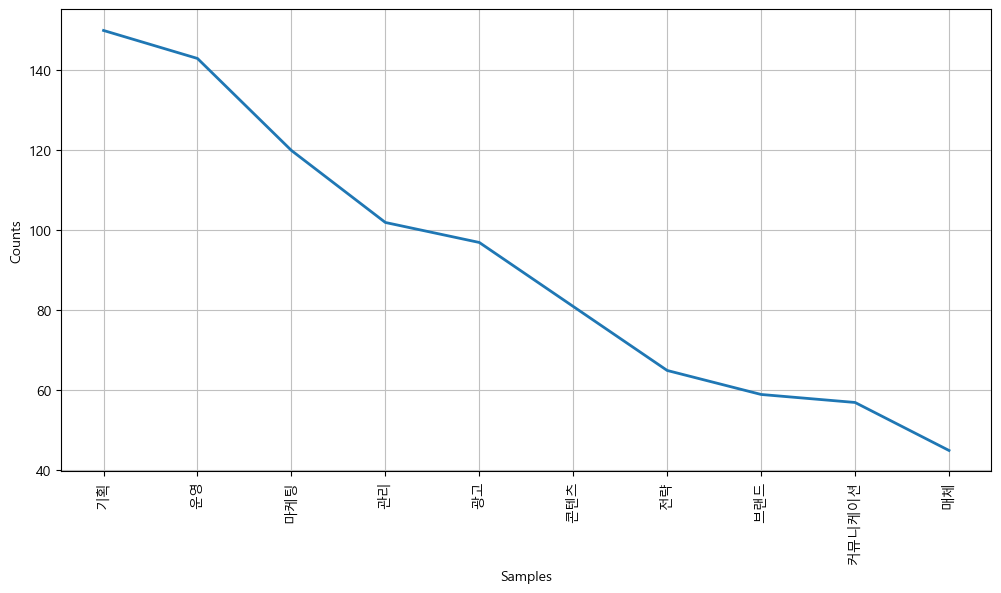

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

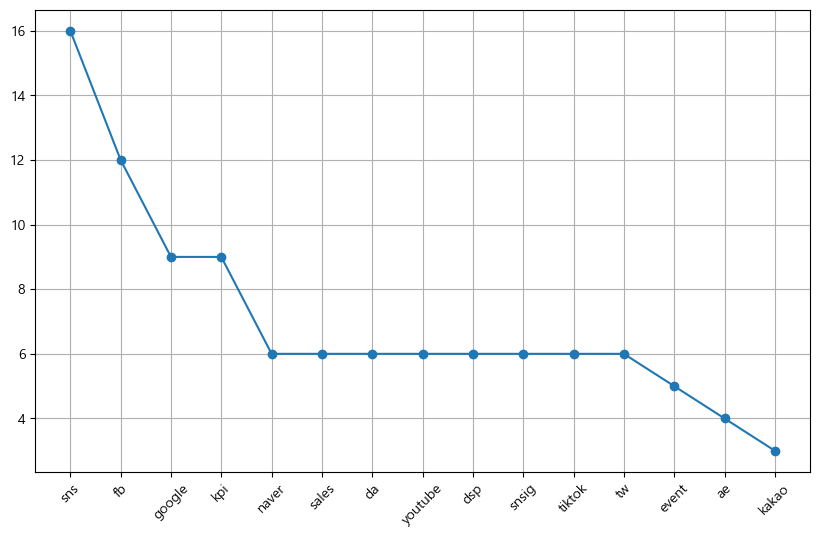

In [11]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['strong','enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)